# Group A Programming Assignment 1 Report

**Authors:** Aidnel M Martínez Meléndez, Alex Demel Pacheco, Edgar J Suárez-Colón  
**Course:** ICOM5015-001D Artificial Intelligence

## Task Division

| Task            | Group Member      |
|:-----------------:|:-------------------:|
| Programming     | Alex Demel        |
| Debugging       | Edgar Suarez      |
| Report Writing  | Aidnel Martínez   |
| Report Editing  | Edgar Suarez      |
| Video Scripting | Aidnel Martínez   |
| Video Editing   | Alex Demel        |

## I. Introduction

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;This project investigates the performance and execution time of native Python versus NumPy arrays for matrix multiplication, a crucial operation in scientific computing. By integrating key concepts such as array handling and storage, computational optimization techniques, and performance metrics, the study aims to underscore the significance of Python libraries, especially NumPy, in boosting computational efficiency. The investigation is anchored on the hypothesis that NumPy arrays, with their advanced computational techniques and efficient data storage, deliver superior performance and reduced execution times for matrix multiplication over native Python arrays. As future computer engineers, this project will equip us with the skills to make informed decisions about the appropriate libraries and methodologies for various programming tasks, thereby enhancing our problem-solving capabilities. Moreover, understanding the impact of different array handling techniques on performance will prepare us for optimizing algorithms and software applications in our future careers, making us more effective and efficient engineers.

## II. Procedure
1. A list of array sizes was defined to test the performance across varied array lengths.
    * Sizes ranging from 10 to 102,400 were established for 1D vectors, and 10 to 400 for 2D matrices, to maintain practicality.
2. For each size, two arrays were initialized with predetermined incrementing floating point numbers (to reduce variability among tests).
3. For Python arrays, the dot product was computed through iterative methods, timing the operation from start to finish.
4. For NumPy arrays, the dot product was computed through the 'dot' function provided by the NumPy library, timing the operation from start to finish.
5. The timing data for these operations were graphically represented against the array sizes to facilitate a comparison between the performance of NumPy and Python arrays.


In [ ]:
!pip install tabulate
!pip install pandas
!pip install numpy
!pip install IPython

## III. Results

In [2]:
import time
import string
import pandas as pd
from IPython.display import display, display_markdown

sizes_1D = [10, 50, 100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600, 51200, 102400]
execution_times_1D_Python = []

for size in sizes_1D:
    python_vec1 = [2.5 * (i + 1) for i in range(size)]
    python_vec2 = [[2.5 * (i + 1)] for i in range(size)]

    python_result_1D = 0

    start_time = time.time()
    for i in range(size):
        python_result_1D += python_vec1[i] * python_vec2[i][0]
    end_time = time.time()

    execution_times_1D_Python.append(end_time - start_time)

display_markdown('''# 1D Python Arrays (Vectors)
The following table contains the execution times for the dot product between two 1D native Python arrays with dimensions 1xN and Nx1, where N is the given size:\n\n
**Note**: for times of 0, the execution time was under the measurement threshold (under 0.1ms).''', raw=True)
df = pd.DataFrame({'Size': sizes_1D, 'Execution Time (seconds)': execution_times_1D_Python})
markdown_str_1D = df.to_markdown(index=False).replace("|-","|:-",3)
display_markdown(markdown_str_1D, raw=True)
display_markdown('**Table 1:** *Execution times for 1D python arrays*', raw=True)

sizes_2D = [10, 50, 100, 200, 400]
execution_times_2D_Python = []

for size in sizes_2D:
    python_matrix1 = [[2.5 * (j + 1) for j in range(size)] for i in range(size)]
    python_matrix2 = [[2.5 * (j + 1) for j in range(size)] for i in range(size)]

    python_result_2D = [[0 for i in range(size)] for i in range(size)]

    start_time = time.time()
    for i in range(size):
        for j in range(size):
            for k in range(size):
                python_result_2D[i][j] += python_matrix1[i][k] * python_matrix2[k][j]
    end_time = time.time()

    execution_times_2D_Python.append(end_time - start_time)

display_markdown('''---
# 2D Python Arrays (Matrices)
The following table contains the execution times for the dot product between two 2D native Python arrays with dimensions NxN and NxN, where N is the given size:\n\n
**Note**: for times of 0, the execution time was under the measurement threshold (under 0.1ms).''', raw=True)
df_2D = pd.DataFrame({'Size': sizes_2D, 'Execution Time (seconds)': execution_times_2D_Python})
markdown_str_2D = df_2D.to_markdown(index=False).replace("|-","|:-",3)
display_markdown(markdown_str_2D, raw=True)
display_markdown('**Table 2:** *Execution times for 2D python arrays*', raw=True)

# 1D Python Arrays (Vectors)
The following table contains the execution times for the dot product between two 1D native Python arrays with dimensions 1xN and Nx1, where N is the given size:


**Note**: for times of 0, the execution time was under the measurement threshold (under 0.1ms).

|   Size |   Execution Time (seconds) |
|:-------:|:---------------------------:|
|     10 |                0           |
|     50 |                0           |
|    100 |                0           |
|    200 |                0           |
|    400 |                0           |
|    800 |                0           |
|   1600 |                0           |
|   3200 |                0           |
|   6400 |                0.00100207  |
|  12800 |                0.000999928 |
|  25600 |                0.00199962  |
|  51200 |                0.0040009   |
| 102400 |                0.00900745  |

**Table 1:** *Execution times for 1D python arrays*

---
# 2D Python Arrays (Matrices)
The following table contains the execution times for the dot product between two 2D native Python arrays with dimensions NxN and NxN, where N is the given size:


**Note**: for times of 0, the execution time was under the measurement threshold (under 0.1ms).

|   Size |   Execution Time (seconds) |
|:-------:|:---------------------------:|
|     10 |                 0.00100303 |
|     50 |                 0.0136459  |
|    100 |                 0.113787   |
|    200 |                 0.923132   |
|    400 |                 9.52668    |

**Table 2:** *Execution times for 2D python arrays*

In [4]:
import numpy as np

sizes_1D = [10, 50, 100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600, 51200, 102400]
execution_times_1D_Numpy = []

for size in sizes_1D:
    numpy_vec1 = np.arange(2.5, 2.5*size + 1, 2.5)
    numpy_vec2 = np.arange(2.5, 2.5*size + 1, 2.5).reshape(size, 1)

    start_time = time.time()
    numpy_result_1D = np.dot(numpy_vec1, numpy_vec2)
    end_time = time.time()

    execution_times_1D_Numpy.append(end_time - start_time)

display_markdown('''# 1D NumPy Arrays (Vectors)
The following table contains the execution times for the dot product between two 1D NumPy arrays with dimensions 1xN and Nx1, where N is the given size:\n\n
**Note**: for times of 0, the execution time was under the measurement threshold (under 0.1ms).''', raw=True)
df_numpy_1D = pd.DataFrame({'Size': sizes_1D, 'Execution Time (seconds)': execution_times_1D_Numpy})
markdown_numpy_1D = df_numpy_1D.to_markdown(index=False).replace("|-","|:-",3)
display_markdown(markdown_numpy_1D, raw=True)
display_markdown(' **Table 3:** *Execution times for 1D NumPy arrays*', raw=True)

sizes_2D = [10, 50, 100, 200, 400]
execution_times_2D_Numpy = []

for size in sizes_2D:
    numpy_matrix1 = np.fromfunction(lambda i, j: 2.5*(j + 1), (size, size), dtype=float)
    numpy_matrix2 = np.fromfunction(lambda i, j: 2.5*(j + 1), (size, size), dtype=float)

    start_time = time.time()
    numpy_result_2D = np.dot(numpy_matrix1, numpy_matrix2)
    end_time = time.time()

    execution_times_2D_Numpy.append(end_time - start_time)

display_markdown('''# 2D NumPy Arrays (Matrices)
The following table contains the execution times for the dot product between two 2D NumPy arrays with dimensions NxN and NxN, where N is the given size:\n\n
**Note**: for times of 0, the execution time was under the measurement threshold (under 0.1ms).''', raw=True)
df_numpy_2D = pd.DataFrame({'Size': sizes_2D, 'Execution Time (seconds)': execution_times_2D_Numpy})
markdown_numpy_2D = df_numpy_2D.to_markdown(index=False).replace("|-","|:-",3)
display_markdown(markdown_numpy_2D, raw=True)
display_markdown('**Table 4:** *Execution times for 2D NumPy arrays*', raw=True)


# 1D NumPy Arrays (Vectors)
The following table contains the execution times for the dot product between two 1D NumPy arrays with dimensions 1xN and Nx1, where N is the given size:


**Note**: for times of 0, the execution time was under the measurement threshold (under 0.1ms).

|   Size |   Execution Time (seconds) |
|:-------:|:---------------------------:|
|     10 |                          0 |
|     50 |                          0 |
|    100 |                          0 |
|    200 |                          0 |
|    400 |                          0 |
|    800 |                          0 |
|   1600 |                          0 |
|   3200 |                          0 |
|   6400 |                          0 |
|  12800 |                          0 |
|  25600 |                          0 |
|  51200 |                          0 |
| 102400 |                          0 |

 **Table 3:** *Execution times for 1D NumPy arrays*

# 2D NumPy Arrays (Matrices)
The following table contains the execution times for the dot product between two 2D NumPy arrays with dimensions NxN and NxN, where N is the given size:


**Note**: for times of 0, the execution time was under the measurement threshold (under 0.1ms).

|   Size |   Execution Time (seconds) |
|:-------:|:---------------------------:|
|     10 |                0           |
|     50 |                0           |
|    100 |                0           |
|    200 |                0.000992298 |
|    400 |                0.000999212 |

**Table 4:** *Execution times for 2D NumPy arrays*

 The following figure shows the size of 1D Python and NumPy arrays against dot product execution time:

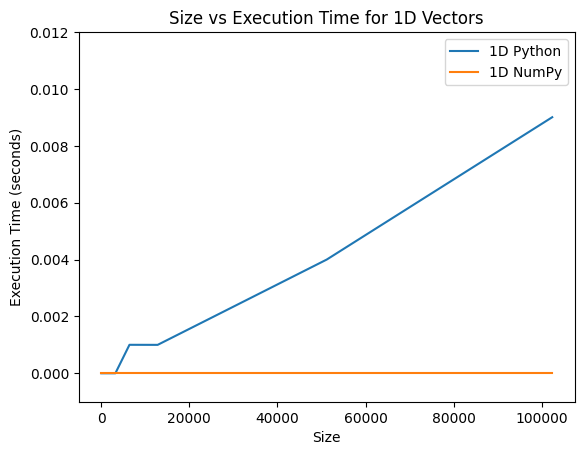

 **Figure 1:** *Size of 1D arrays vs Execution time*

---

 The following figure shows the size of 2D Python and NumPy arrays against dot product execution time:

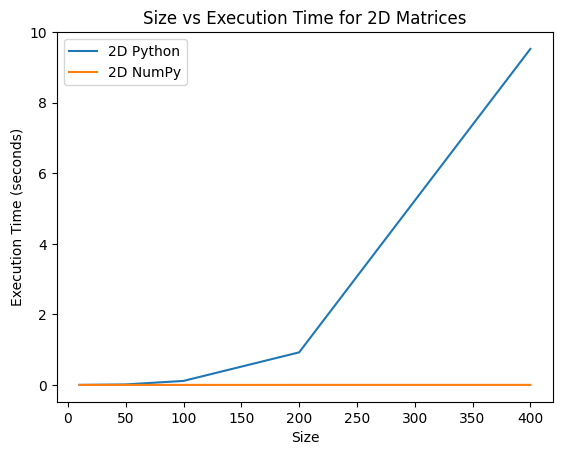

 **Figure 2:** *Size of 2D arrays vs Execution time*

In [5]:
import matplotlib.pyplot as plt

display_markdown(''' The following figure shows the size of 1D Python and NumPy arrays against dot product execution time:''', raw=True)

plt.plot(sizes_1D, execution_times_1D_Python, label='1D Python')
plt.plot(sizes_1D, execution_times_1D_Numpy, label='1D NumPy')
plt.xlabel('Size')
plt.ylabel('Execution Time (seconds)')
plt.title('Size vs Execution Time for 1D Vectors')
plt.legend()
plt.ylim(-0.001, 0.012)
plt.show()
display_markdown(' **Figure 1:** *Size of 1D arrays vs Execution time*', raw=True)

display_markdown("---", raw=True)

display_markdown(''' The following figure shows the size of 2D Python and NumPy arrays against dot product execution time:''', raw=True)
plt.plot(sizes_2D, execution_times_2D_Python, label='2D Python')
plt.plot(sizes_2D, execution_times_2D_Numpy, label='2D NumPy')
plt.xlabel('Size')
plt.ylabel('Execution Time (seconds)')
plt.title('Size vs Execution Time for 2D Matrices')
plt.legend()
plt.show()
display_markdown(' **Figure 2:** *Size of 2D arrays vs Execution time*', raw=True)

## IV. Analysis

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;This comparative analysis delves into the processing capabilities of native Python and NumPy for 1D arrays (vectors) and 2D 
arrays (matrices), focusing on how execution time varies with array size and dimensionality. In the realm of 1D vectors, native Python’s execution time for array multiplications remains negligible for sizes up to 3,200 elements, as evidenced by **Table 1**. Beyond this size, there is a gradual increase in execution time, indicating a relatively linear relationship between execution time and array size, as seen in ****Figure 1**. However, in the case of 2D matrices, native Python exhibits a significant increase in execution time as the size grows, showcasing a polynomial or potentially worse time complexity, as shown in **Table 2** and **Figure 2**. This increase is attributed to the nested iterations required for processing elements within a 2D structure, leading to an exponential rise in computational overhead.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Contrastingly, NumPy stands out for its exceptional efficiency in managing both vectors and matrices. The execution times for 1D vector multiplication with NumPy remain virtually zero across all tested sizes, as depicted in **Table 3**, demonstrating NumPy's superior capability in handling vector data efficiently. Similarly, NumPy processes 2D matrices with negligible times for smaller dimensions, and only a modest increase is observed for larger sizes, as shown in **Table 4**. This stark disparity in execution times between native Python and NumPy can be attributed to several critical factors.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;NumPy's use of contiguous memory blocks significantly reduces overhead and improves cache efficiency, crucial for the management of large datasets [1]. Conversely, Python lists face performance drawbacks because of their fragmented memory allocation, which not only consumes more space but also necessitates type verification and additional maintenance operations during processing [2]. Moreover, NumPy's operations are vectorized, eliminating the need for explicit loops and leveraging low-level optimizations and SIMD (Single Instruction, Multiple Data) capabilities, which dramatically reduces execution times for array operations [1]. Additionally, the core of NumPy is implemented in C and Fortran, allowing for the direct execution of compiled machine code [3], in stark contrast to native Python's interpreted execution, which introduces additional overhead [4]. These factors collectively contribute to NumPy's distinguished performance in numerical computations, highlighting its efficiency and scalability advantages over native Python, especially in scientific computing and data analysis contexts.


## V. Conclusion

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The findings from this project decisively validate NumPy's superior performance over native Python arrays in executing matrix multiplication tasks. Through methodical testing across a spectrum of array sizes and dimensions, it has been demonstrated that NumPy's advanced computational strategies and efficient data storage mechanisms significantly reduce execution times, particularly for complex operations involving 2D matrices. This contrast in efficiency not only validates our initial hypothesis but also emphasizes the critical role of optimized libraries like NumPy in scientific computing.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The findings underscore the importance of selecting appropriate computational tools and libraries to enhance programming efficiency and effectiveness. As future computer engineers, this insight is invaluable, showcasing the significant benefits of contiguous memory allocation, vectorization, and the use of compiled languages. As we progress in our careers, the skills and understanding gained from this investigation will undoubtedly contribute to our development as proficient and resourceful engineers.

# References

1. Veyak, “Numpy vs traditional python lists: A performance showdown,” Medium, https://medium.com/@vakgul/numpy-vs-traditional-python-lists-a-performance-showdown-1e8bebc55933 (accessed Feb. 24, 2024).
2. GeeksforGeeks, “Python lists vs Numpy Arrays,” GeeksforGeeks,https://www.geeksforgeeks.org/python-lists-vs-numpy-arrays/ (accessed Feb. 24, 2024).
3. Numpy Docs, “NumPy internals,” NumPy internals - NumPy v1.21 Manual, https://numpy.org/doc/1.21/reference/internals.html (accessed Feb. 24, 2024).
4. freeCodeCamp.org, “Interpreted vs compiled programming languages: What’s the difference?,” Interpreted vs Compiled Programming Languages, https://www.freecodecamp.org/news/compiled-versus-interpreted-languages/ (accessed Feb. 24, 2024).
